In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
from wordcloud import WordCloud
import nltk

In [ ]:
df_credit = pd.read_csv("/content/credit_data.csv",index_col=0)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [ ]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

data_values = df_credit.Risk.value_counts()

fig = go.Figure(data=go.Bar(
    x=data_values.index,
    y=data_values.values,
    marker=dict(
        color=data_values.values,
        colorscale='Viridis',
        line=dict(color='honeydew', width=2)
    ),
))

fig.update_traces(text=data_values.values, textposition='auto')

fig.update_layout(
    title='Distribution of Risk Categories',
    xaxis_title='Risk Category',
    yaxis_title='Count',
    autosize=True,
    showlegend=False
)

fig.show(renderer="colab")


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set renderer for Google Colab
pio.renderers.default = 'colab'

# Data preparation
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}], [{'colspan': 2}, None]],
    subplot_titles=('Good', 'Bad', 'General Distribution')
)

# Add traces
trace0 = go.Histogram(x=df_good, histnorm='probability', name="Good Credit")
trace1 = go.Histogram(x=df_bad, histnorm='probability', name="Bad Credit")
trace2 = go.Histogram(x=df_age, histnorm='probability', name="Overall Age")

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.add_trace(trace2, row=2, col=1)

# Update layout
fig.update_layout(
    title='Age Distribution',
    bargap=0.05,
    showlegend=True
)

# Show plot
fig.show()

In [ ]:
pio.renderers.default = 'colab'

housing_own = df_credit[df_credit['Housing'] == 'own']
housing_rent = df_credit[df_credit['Housing'] == 'rent']
housing_free = df_credit[df_credit['Housing'] == 'free']

hist_data = [
    housing_own['Credit amount'],
    housing_rent['Credit amount'],
    housing_free['Credit amount']
]
group_labels = ['own', 'rent', 'free']

housing_amount = pd.DataFrame({
    'own': [housing_own['Credit amount'].mean()],
    'rent': [housing_rent['Credit amount'].mean()],
    'free': [housing_free['Credit amount'].mean()]
})

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig1.update_layout(title='Credit Distribution by Housing')

fig2 = go.Figure(
    data=px.bar(
        x=housing_amount.columns,
        y=housing_amount.iloc[0],
        color=housing_amount.columns,
        title='Average Credit Amount per Housing'
    ).data
)
fig2.update_layout(xaxis_title="Housing", yaxis_title="Average Credit Amount")

# Show plots
fig1.show()
fig2.show()

In [ ]:
pio.renderers.default = 'colab'

trace0 = go.Bar(
    x=df_credit[df_credit["Risk"] == 'good']["Purpose"].value_counts().index.values,
    y=df_credit[df_credit["Risk"] == 'good']["Purpose"].value_counts().values,
    name='Good Credit'
)

trace1 = go.Bar(
    x=df_credit[df_credit["Risk"] == 'bad']["Purpose"].value_counts().index.values,
    y=df_credit[df_credit["Risk"] == 'bad']["Purpose"].value_counts().values,
    name='Bad Credit'
)

fig = go.Figure(data=[trace0, trace1])
fig.update_layout(
    title='Purpose Distribution by Credit Risk',
    xaxis_title='Purpose',
    yaxis_title='Count',
    barmode='group'
)
fig.show()

In [ ]:
def one_hot_encoder(df, nan_as_category=False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [ ]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df_credit.columns = df_credit.columns.str.strip()

In [ ]:
df_credit.rename(columns={'Saving account': 'Saving accounts'}, inplace=True)


df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

def categorize_age(age):
    if age < 25:
        return 'Student'
    elif age < 35:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df_credit['Age_cat'] = df_credit['Age'].apply(categorize_age)

df_credit = df_credit.merge(pd.get_dummies(df_credit['Purpose'], prefix='Purpose'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Sex'], prefix='Sex'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Housing'], prefix='Housing'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Saving accounts'], prefix='Savings'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Risk'], prefix='Risk'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Checking account'], prefix='Check'), left_index=True, right_index=True)
df_credit = df_credit.merge(pd.get_dummies(df_credit['Age_cat'], prefix='Age_cat'), left_index=True, right_index=True)

for col in ["Saving accounts", "Checking account", "Purpose", "Sex", "Housing", "Age_cat", "Risk", "Risk_good"]:
    if col in df_credit.columns:
        del df_credit[col]

print(df_credit.shape)
print(df_credit.head())

(1000, 31)
   Age  Job  Credit amount  Duration  Purpose_business  Purpose_car  \
0   67    2           1169         6             False        False   
1   22    2           5951        48             False        False   
2   49    1           2096        12             False        False   
3   45    2           7882        42             False        False   
4   53    2           4870        24             False         True   

   Purpose_domestic appliances  Purpose_education  \
0                        False              False   
1                        False              False   
2                        False               True   
3                        False              False   
4                        False              False   

   Purpose_furniture/equipment  Purpose_radio/TV  ...  Savings_rich  Risk_bad  \
0                        False              True  ...         False     False   
1                        False              True  ...         False      True   


In [ ]:
expected_cols = ['Age', 'Job', 'Credit_amount', 'Duration',
                 'Purpose_business','Purpose_car','Purpose_domestic_appliances','Purpose_education',
                 'Purpose_furniture_equipment','Purpose_radio_TV','Purpose_repairs','Purpose_vacation_others',
                 'Sex_female', 'Sex_male','Housing_free', 'Housing_own','Housing_rent',
                 'Savings_little', 'Savings_moderate','Savings_no_inf','Savings_quite_rich', 'Savings_rich',
                 'Risk_bad','Check_little', 'Check_moderate', 'Check_no_inf', 'Check_rich',
                 'Age_cat_Student', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior']

print("Expected:", len(expected_cols))
print("Current:", len(df_credit.columns))

if len(expected_cols) == len(df_credit.columns):
    df_credit.columns = expected_cols
else:
    print("Column mismatch! Can't rename safely.")


Expected: 31
Current: 31


In [ ]:
linear_corr = df_credit.corr(method='pearson').round(2)


corr_heatmap = px.imshow(linear_corr,
                         text_auto=True,
                         labels=dict(x="Features", y="Features",
                                     color="Correlation"),
                         color_continuous_scale=px.colors.sequential.RdBu,
                         title="Linear Correlation (Heatmap)",
                         height=1000
                         )

corr_heatmap.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title="Features",
    yaxis_title="Features",
    coloraxis_colorbar_title="Correlation"
)

corr_heatmap.show()

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, f1_score, roc_curve, auc #To evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from termcolor import colored

In [ ]:
df_credit.columns

Index(['Age', 'Job', 'Credit_amount', 'Duration', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic_appliances', 'Purpose_education',
       'Purpose_furniture_equipment', 'Purpose_radio_TV', 'Purpose_repairs',
       'Purpose_vacation_others', 'Sex_female', 'Sex_male', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Savings_little', 'Savings_moderate',
       'Savings_no_inf', 'Savings_quite_rich', 'Savings_rich', 'Risk_bad',
       'Check_little', 'Check_moderate', 'Check_no_inf', 'Check_rich',
       'Age_cat_Student', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [ ]:
X = df_credit[['Age', 'Job', 'Credit_amount', 'Duration', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic_appliances', 'Purpose_education',
       'Purpose_furniture_equipment', 'Purpose_radio_TV', 'Purpose_repairs',
       'Purpose_vacation_others', 'Sex_female', 'Sex_male', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Savings_little', 'Savings_moderate',
       'Savings_no_inf', 'Savings_quite_rich', 'Savings_rich',
       'Check_little', 'Check_moderate', 'Check_no_inf', 'Check_rich',
       'Age_cat_Student', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior']]
y = df_credit["Risk_bad"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(iterations=500, learning_rate=0.2, random_state=42, max_depth=8)

model.fit(X_train, y_train)

0:	learn: 0.6186550	total: 56.2ms	remaining: 28s
1:	learn: 0.5679932	total: 62ms	remaining: 15.4s
2:	learn: 0.5257623	total: 69.9ms	remaining: 11.6s
3:	learn: 0.4871502	total: 77.8ms	remaining: 9.65s
4:	learn: 0.4568505	total: 85.1ms	remaining: 8.42s
5:	learn: 0.4382523	total: 93ms	remaining: 7.66s
6:	learn: 0.4230873	total: 99.4ms	remaining: 7s
7:	learn: 0.4122116	total: 105ms	remaining: 6.48s
8:	learn: 0.4026795	total: 113ms	remaining: 6.16s
9:	learn: 0.3905432	total: 118ms	remaining: 5.79s
10:	learn: 0.3820169	total: 123ms	remaining: 5.46s
11:	learn: 0.3698391	total: 128ms	remaining: 5.19s
12:	learn: 0.3608194	total: 136ms	remaining: 5.08s
13:	learn: 0.3528863	total: 144ms	remaining: 5.01s
14:	learn: 0.3444342	total: 151ms	remaining: 4.89s
15:	learn: 0.3325543	total: 157ms	remaining: 4.75s
16:	learn: 0.3221327	total: 160ms	remaining: 4.54s
17:	learn: 0.3145592	total: 164ms	remaining: 4.38s
18:	learn: 0.3022483	total: 170ms	remaining: 4.3s
19:	learn: 0.2930717	total: 177ms	remaining:

Accuracy: 0.71
Confusion Matrix: [[115  26]
 [ 32  27]]
F-beta Score: 0.4671280276816609
F1 Score: 0.48214285714285715


              precision    recall  f1-score   support

       False       0.78      0.82      0.80       141
        True       0.51      0.46      0.48        59

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.71       200



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

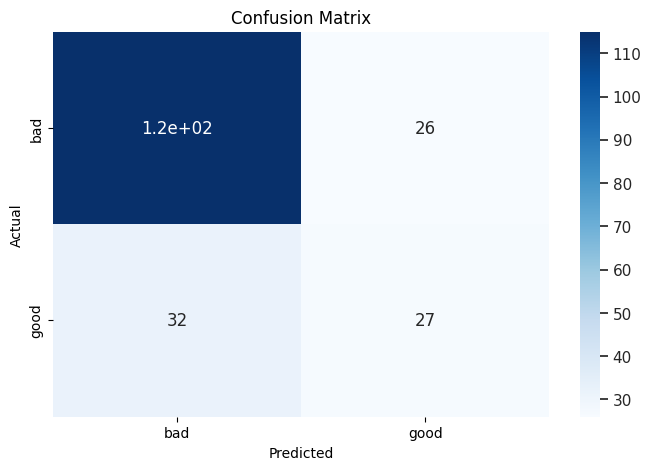

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
beta_score = fbeta_score(y_test, y_pred, beta=2)
f1score = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")
print(f"F-beta Score: {beta_score}")
print(f"F1 Score: {f1score}")
print("\n")
print(classification_report(y_test, y_pred))

y_true = ["bad", "good"]
y_pred_labels = ["bad", "good"]
df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index=np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes

plt.figure(figsize=(8, 5))
plt.title('Confusion Matrix')
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 12})


In [ ]:
def format_percent(value):
    return f'{value:.2%}'

total = sum(sum(cm))

sensitivity_recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print(colored('Sensitivity (Recall): ', 'blue', attrs=['bold']),
      colored(format_percent(sensitivity_recall), 'blue', attrs=['bold']))

specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print(colored('Specificity: ', 'green', attrs=['bold']),
      colored(format_percent(specificity), 'green', attrs=['bold']))

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(colored('Precision: ', 'yellow', attrs=['bold']),
      colored(format_percent(precision), 'yellow', attrs=['bold']))

accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print(colored('Accuracy: ', 'magenta', attrs=['bold']),
      colored(format_percent(accuracy), 'magenta', attrs=['bold']))


Sensitivity (Recall):  78.23%
Specificity:  50.94%
Precision:  81.56%
Accuracy:  71.00%


Area under the curve: 0.75


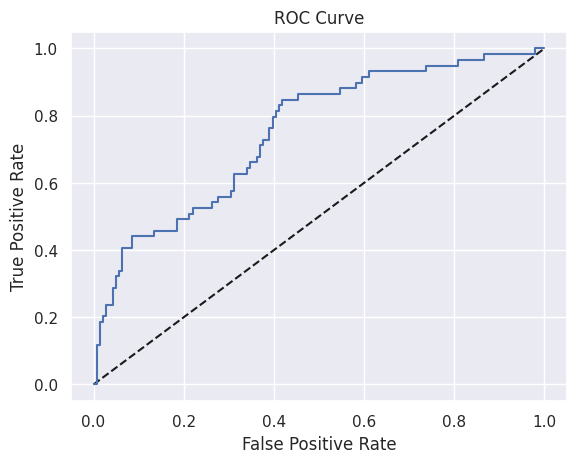

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr_cat, tpr_cat, thresholds = roc_curve(y_test, y_pred_prob)

print("Area under the curve: %.2f" %auc(fpr_cat, tpr_cat))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cat, tpr_cat)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<Axes: xlabel='Importances', ylabel='Feature Id'>

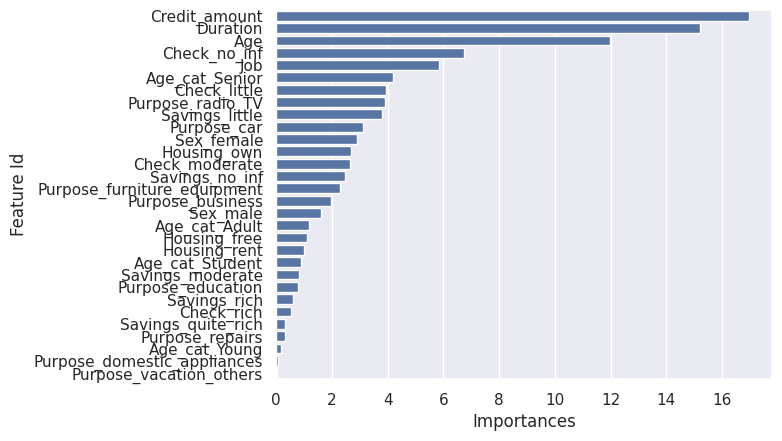

In [ ]:
import shap
feature_importance = model.get_feature_importance(prettified=True)
sns.barplot(x="Importances", y="Feature Id", data=feature_importance)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid
iterations = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(4, 10, num=7)]
min_data_in_leaf = [2, 5, 10]

random_grid = {
    'iterations': iterations,
    'depth': max_depth,
    'min_data_in_leaf': min_data_in_leaf
}


cat_boost = CatBoostClassifier(random_state=100, verbose=0)

cat_random = RandomizedSearchCV(
    estimator=cat_boost,
    param_distributions=random_grid,
    n_iter=50,
    cv=5,
    scoring='recall',
    random_state=42,
    n_jobs=-1
)

cat_random.fit(X_train, y_train)

print("Best parameters:", cat_random.best_params_)
print("Best score:", cat_random.best_score_)

Best parameters: {'min_data_in_leaf': 5, 'iterations': 522, 'depth': 10}
Best score: 0.4276360544217687


In [ ]:
print(cat_random.best_params_)
print(cat_random.best_score_)

{'min_data_in_leaf': 5, 'iterations': 522, 'depth': 10}
0.4276360544217687


Accuracy: 0.73
Confusion Matrix: 
[[121  20]
 [ 34  25]]
F-beta score: 0.44483985765124556
F1 Score: 0.4807692307692308

Classification Report:

              precision    recall  f1-score   support

       False       0.78      0.86      0.82       141
        True       0.56      0.42      0.48        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.71      0.73      0.72       200



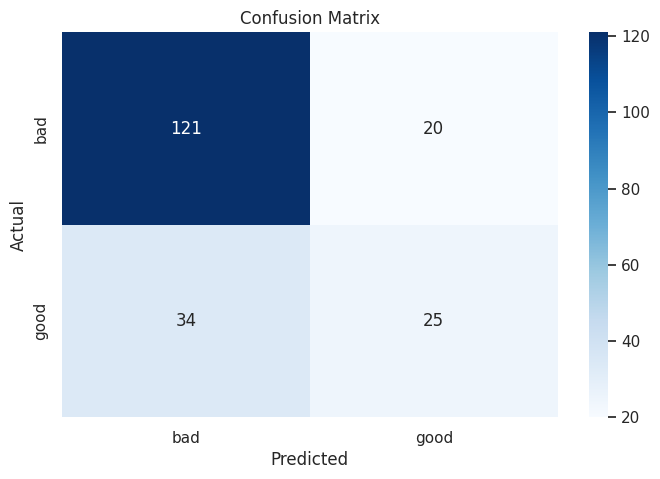

In [ ]:
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_pred = cat_random.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
beta_score = fbeta_score(y_test, y_pred, beta=2)
f1score = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{cm}")
print(f"F-beta score: {beta_score}")
print(f"F1 Score: {f1score}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

labels = ["bad", "good"]
df_cm = pd.DataFrame(cm, columns=labels, index=labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(8, 5))
plt.title('Confusion Matrix')
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 12})
plt.show()

In [ ]:
def format_percent(value):
    return f'{value:.2%}'

total = sum(sum(cm))
sensitivity_recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print(colored('Sensitivity_recall : ', 'blue', attrs=['bold']), colored(format_percent(sensitivity_recall), 'blue', attrs=['bold']))

Specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print(colored('Specificity: ', 'green', attrs=['bold']), colored(format_percent(Specificity), 'green', attrs=['bold']))

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(colored('Precision: ', 'yellow', attrs=['bold']), colored(format_percent(precision), 'yellow', attrs=['bold']))

accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print(colored('Accuracy: ', 'magenta', attrs=['bold']), colored(format_percent(accuracy), 'magenta', attrs=['bold']))


Sensitivity_recall :  78.06%
Specificity:  55.56%
Precision:  85.82%
Accuracy:  73.00%


Area under the curve: 0.77


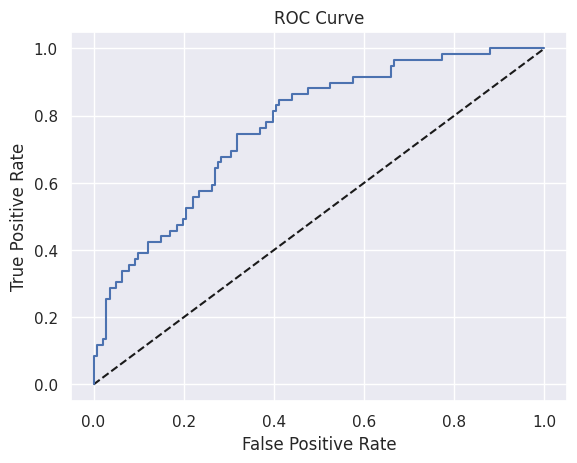

In [ ]:
y_pred_prob = cat_random.predict_proba(X_test)[:,1]

fpr_CV, tpr_CV, thresholds = roc_curve(y_test, y_pred_prob)

print("Area under the curve: %.2f" %auc(fpr_CV, tpr_CV))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_CV, tpr_CV)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
param_test1 = {
 'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
model_xg = XGBClassifier(random_state=100)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 0.85, 'gamma': 0.3, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.85}
0.5022959183673469


Accuracy: 0.76
Confusion Matrix: [[120  21]
 [ 27  32]]
F-beta score: 0.5536332179930796
F1 Score: 0.5714285714285714


              precision    recall  f1-score   support

       False       0.82      0.85      0.83       141
        True       0.60      0.54      0.57        59

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.76       200



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

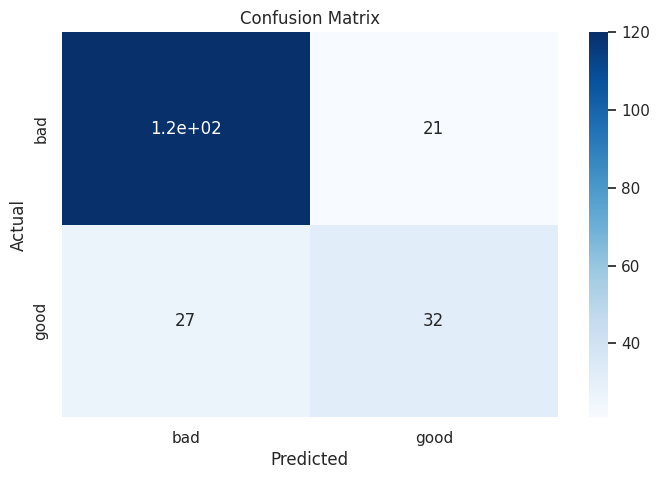

In [ ]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
beta_score = fbeta_score(y_test, y_pred, beta=2)
f1score = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}" )
print(f"Confusion Matrix: {cm}" )
print(f"F-beta score: {beta_score}" )
print(f"F1 Score: {f1score}" )
print("\n")
print(classification_report(y_test, y_pred))

y_true = ["bad", "good"]
y_pred = ["bad", "good"]
df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.dtypes

plt.figure(figsize = (8,5))
plt.title('Confusion Matrix')
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})

In [ ]:

def format_percent(value):
    return f'{value:.2%}'

total = sum(sum(cm))
sensitivity_recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print(colored('Sensitivity_recall : ', 'blue', attrs=['bold']), colored(format_percent(sensitivity_recall), 'blue', attrs=['bold']))

Specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print(colored('Specificity: ', 'green', attrs=['bold']), colored(format_percent(Specificity), 'green', attrs=['bold']))

precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(colored('Precision: ', 'yellow', attrs=['bold']), colored(format_percent(precision), 'yellow', attrs=['bold']))

accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print(colored('Accuracy: ', 'magenta', attrs=['bold']), colored(format_percent(accuracy), 'magenta', attrs=['bold']))

Sensitivity_recall :  81.63%
Specificity:  60.38%
Precision:  85.11%
Accuracy:  76.00%


Area under the curve: 0.77


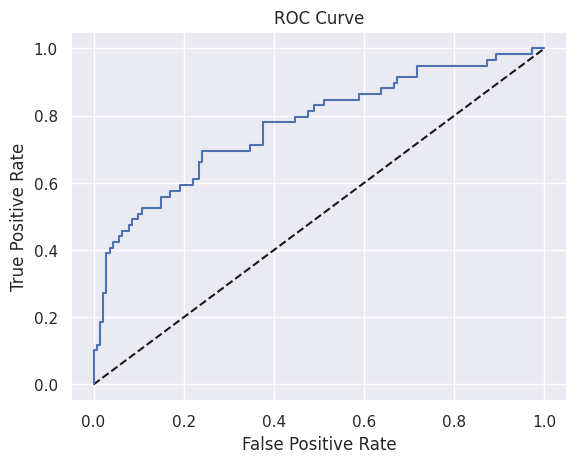

In [ ]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_prob)

print("Area under the curve: %.2f" %auc(fpr_xg, tpr_xg))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xg, tpr_xg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc_xg = auc(fpr_xg, tpr_xg)
auc_cat = auc(fpr_cat, tpr_cat)
auc_CV = auc(fpr_CV, tpr_CV)

trace1 = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guess')

trace2 = go.Scatter(x=fpr_xg, y=tpr_xg, mode='lines', line=dict(color='blue'), name=f'XGBoost (AUC = {auc_xg:.2f})')

trace3 = go.Scatter(x=fpr_cat, y=tpr_cat, mode='lines+markers', line=dict(color='green'), name=f'Catboost (AUC = {auc_cat:.2f})')

trace4 = go.Scatter(x=fpr_CV, y=tpr_CV, mode='lines+markers', line=dict(color='red'), name=f'Catboost Tuning (AUC = {auc_CV:.2f})')

layout = go.Layout(
    title='ROC Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    height=500
)

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

fig.show()